# 10 Working with data

After you’ve identified the questions you’re trying to answer and have gotten your hands on some data, you might be tempted to dive in and immediately start building models and getting answers. But you should resist this urge. Your first step should be to explore your data.


Exploring One-Dimensional Data
The simplest case is when you have a one-dimensional dataset, which is just a collection of numbers. For example, these could be the daily average number of minutes each user spends on your site, the number of times each of a collection of data science tutorial videos was watched, or the number of pages of each of the data science books in your data science library.
An obvious first step is to compute a few summary statistics. You’d like to know how many data points you have, the smallest, the largest, the mean, and the standard deviation.
But even these don’t necessarily give you a great understanding. A good next step is to create a histogram, in which you group your data into discrete buckets and count how many points fall into each bucket:

In [3]:
import math
from typing import List
from typing import Dict
from collections import Counter

In [8]:
import matplotlib.pyplot as plt

def bucketsize(point:float, bucket_size:float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points:List[float], bucket_size:float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketsize(point, bucket_size) for point in points)

def plot_hisogram(points:List[float], bucket_size:float, title:str=''):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size, edgecolor='black')
    plt.title(title)


In [9]:
import random
from scratchlib.probability import inverse_normal_cdf

random.seed()

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for __ in range(0, 10000)]

# normal distribution with mean 0, stddev 57
normal = [57 * inverse_normal_cdf(random.random()) for __ in range(0, 10000)]

Both have means close to 0 and standard deviations close to 58. However, they have very different distributions

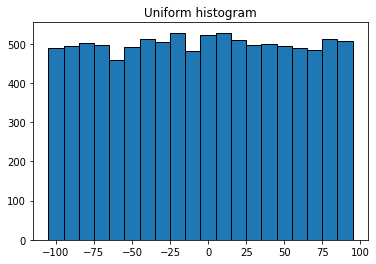

In [10]:
plot_hisogram(uniform, 10, 'Uniform histogram')

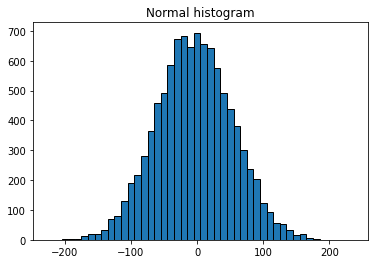

In [11]:
plot_hisogram(normal, 10, 'Normal histogram')

In this case the two distributions have a pretty different and , but even knowing that wouldn’t have been sufficient to understand how they differed.

## Two Dimensions

Now imagine you have a dataset with two dimensions. Maybe in addition to daily minutes you have years of data science experience. Of course you’d want to understand each dimension individually. But you probably also want to scatter the data.


For example, consider another fake dataset:

In [12]:
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for __ in range(0, 1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

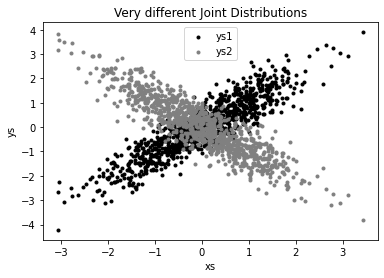

In [13]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title('Very different Joint Distributions')
plt.show()

This difference would also be apparent if you looked at the correlations:

In [15]:
from scratchlib.statistics import correlation

print(correlation(xs, ys1))
print(correlation(xs, ys2))

0.899066106344607
-0.8920375760419578
